In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import gsw
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor":  "white",  
    "savefig.facecolor": "white",  
    "figure.figsize": [8,6]
})
import scipy.signal as signal
import src.helper as helper
from src.location import Location
from src.ctd_cast import CTDCast
from src.mooring import Mooring
import src.read_CTDs
from geopy.distance import distance as geopy_distance
import datetime as datetime

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# Get each mooring location

list_of_moorings = helper.IO.load_pickle(name="../../data/mooring/list_of_moorings.pkl")

mooring_locations = [mooring.location for mooring in list_of_moorings]
mooring_locations

[Location(lat=np.float64(-63.4032), lon=np.float64(-52.287)),
 Location(lat=np.float64(-63.5145), lon=np.float64(-51.6357)),
 Location(lat=np.float64(-63.656), lon=np.float64(-50.8113)),
 Location(lat=np.float64(-63.7783), lon=np.float64(-50.0897)),
 Location(lat=np.float64(-63.917), lon=np.float64(-49.2682)),
 Location(lat=np.float64(-64.0665), lon=np.float64(-48.3805)),
 Location(lat=np.float64(-64.2157), lon=np.float64(-47.4903))]

In [4]:
CTDs = src.read_CTDs.load_Joinville_transect_CTDs()

loading of ../../data/CTD/joinville_transect_ctds_incl_neutral_density.csv was successful
renaming of matlab style columns
Var1 	 index
Event 	 Event
Latitude 	 Latitude
Longitude 	 Longitude
Press_dbar_ 	 Press [dbar]
Sal 	 Sal
Temp__C_ 	 Temp [°C]
AbsoluteSalinity 	 Absolute Salinity
ConservativeTemperature 	 Conservative Temperature
Date_Time 	 Date/Time
DepthWater_m_ 	 Depth water [m]
Expedition 	 Expedition
neutral_density 	 Neutral density [kg m^-3]


In [5]:
CTDs

,Event,Latitude,Longitude,Press [dbar],Sal,Temp [°C],Absolute Salinity,Conservative Temperature,Date/Time,Depth water [m],Expedition,Neutral density [kg m^-3]
index,,,,,,,,,,,,
0,PS129_100_03,-64.2810,-47.4670,2,34.0119,-1.8516,34.178135,-1.847690,2022-04-19 22:48:30,1.980490,PS129,27.607695
1,PS129_100_03,-64.2810,-47.4670,3,34.0117,-1.8519,34.177921,-1.848007,2022-04-19 22:48:30,2.970727,PS129,27.607518
2,PS129_100_03,-64.2810,-47.4670,4,34.0122,-1.8555,34.178410,-1.851625,2022-04-19 22:48:30,3.960960,PS129,27.608094
3,PS129_100_03,-64.2810,-47.4670,5,34.0123,-1.8562,34.178497,-1.852341,2022-04-19 22:48:30,4.951188,PS129,27.608210
4,PS129_100_03,-64.2810,-47.4670,6,34.0125,-1.8567,34.178685,-1.852858,2022-04-19 22:48:30,5.941411,PS129,27.608414
...,...,...,...,...,...,...,...,...,...,...,...,...
291032,PS117_93-1,-63.2557,-53.4054,381,34.5890,-0.8440,NaN,NaN,2019-01-31 22:21:00,377.000000,PS117,28.228339
291033,PS117_93-1,-63.2557,-53.4054,382,34.5890,-0.8431,NaN,NaN,2019-01-31 22:21:00,378.000000,PS117,28.228201
291034,PS117_93-1,-63.2557,-53.4054,383,34.5891,-0.8413,NaN,NaN,2019-01-31 22:21:00,378.900000,PS117,28.228139


In [6]:
CTDs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291037 entries, 0 to 291036
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Event                      291037 non-null  object 
 1   Latitude                   291037 non-null  float64
 2   Longitude                  291037 non-null  float64
 3   Press [dbar]               291037 non-null  int64  
 4   Sal                        291037 non-null  float64
 5   Temp [°C]                  290878 non-null  float64
 6   Absolute Salinity          40161 non-null   float64
 7   Conservative Temperature   40161 non-null   float64
 8   Date/Time                  291037 non-null  object 
 9   Depth water [m]            291037 non-null  float64
 10  Expedition                 291037 non-null  object 
 11  Neutral density [kg m^-3]  290878 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 28.9+ MB


In [7]:
#OUTLIERS = ['PS71/216-1', 'PS40/099-1', 'PS49/015-2', 'PS71/212-3', 'PS71/210-2']

In [8]:
# Get each mooring location
#list_of_moorings = helper.IO.load_pickle(name="/home/ole/Desktop/Mooring_Analysis/energy_levels/data/list_of_moorings")
mooring_locations = [mooring.location for mooring in list_of_moorings]
# create dictionary of the mooring coordinates with empty values
dict_of_closest_ctds = {str(mooring):[] for mooring in mooring_locations}

MAXIMUM_DISTANCE_FROM_MOORING = 20 #in kilometers
NUMBER_OF_CTDs_PER_MOORING = 26

#Look only at casts and their geographic location, the cast data itself will be used later
stats = CTDs.groupby(['Event','Latitude','Longitude']).size().reset_index().rename(columns={0:'count'})
stats = stats.loc[(stats["count"]!=0)]
#drop casts that contain not enough data (alternatively looking at the max depth of each cast would also be possible)
stats.drop(stats[stats["count"] < 200].index, inplace = True) 
stats.reset_index(inplace = True, drop=True)

#Calculate Distances to the mooring locations
for i,mooring_location in enumerate(mooring_locations):
    location_tuple = (mooring_location.lat, mooring_location.lon)
    stats[f"Dist. to {mooring_location}"] = stats.apply(lambda row : geopy_distance(location_tuple, (row.Latitude, row.Longitude)).km, axis = 1)

# select the 3 closest CTD profiles
# Appending to a dataframe is bad form, but I still do it here because teh data frame remains very small

# append names of closest cast to the respective mooring key
for mooring,column_mooring_name in zip(mooring_locations,(list(stats.columns)[4:])):
    # check current mooring against the column name to see if they refer to the same mooring
    #print(str(mooring),column_mooring_name[9:])
    assert str(mooring) == column_mooring_name[9:]

    # sort the dataframe after the distances to the current mooring
    # and get the first 3 closest casts 
    temp = stats.sort_values(by = column_mooring_name)

    list_of_events = temp["Event"].iloc[0:NUMBER_OF_CTDs_PER_MOORING].to_list()
    list_of_distances = temp[column_mooring_name].iloc[0:NUMBER_OF_CTDs_PER_MOORING].to_numpy()

    #replace all cast names with NaNs that are further away from the mooring location than allowed
    is_close = np.less_equal(list_of_distances,MAXIMUM_DISTANCE_FROM_MOORING)
    list_of_events = [event if close else np.nan for (event, close) in zip(list_of_events, is_close) ]

    #for sanity checks, take a look again at the new list_of_distances
    #list_of_distances = [np.round(distance,2) if close else np.nan for (distance, close) in zip(list_of_distances, is_close) ]


    print(mooring)
    print("   ",list_of_events,"\n   ",list_of_distances)

    dict_of_closest_ctds[str(mooring)].extend(list_of_events)

(-63.40,-52.29)
    ['PS103_61-1', 'PS129_119_01', 'PS117_82-1', 'PS67/124-1', 'PS49/005-1', 'PS103_60-1', 'PS81/512-1', 'PS81/513-1', 'PS71/220-2', 'PS129_117_01', 'PS71/221-1', 'PS23/070-2', 'PS77/120-1', 'PS71/221-2', 'PS16/148-1', 'PS23/069-4', 'PS18/041-1', 'PS49/007-3', 'PS18/042-1', 'PS77/111-3', 'PS16/147-1', 'PS16/146-1', 'PS103_62-1', 'PS40/101-1', nan, nan] 
    [ 0.15635909  1.06596929  6.93234935  7.22284917  8.32913869  9.62214074
 11.73997644 11.79570414 11.83122648 11.93444154 12.40380995 12.44207675
 12.50769083 12.76461396 13.07789017 13.18050561 13.49452844 13.74269024
 13.92607705 14.08379199 14.26395879 15.17470196 16.06377155 18.58729255
 22.0135487  22.81245072]
(-63.51,-51.64)
    ['PS103_59-2', 'PS129_114_02', 'PS16/149-1', 'PS117_85-1', 'PS81/514-1', 'PS117_75-1', 'PS77/112-1', 'PS49/006-1', 'PS49/008-1', 'PS49/010-1', 'PS67/123-1', 'PS129_112_01', 'PS129_116_01', 'PS71/218-1', 'PS81/110-1', 'PS103_65-1', 'PS23/068-4', 'PS16/150-1', 'PS71/219-1', 'PS40/100-1',

In [9]:
closest_ctds = pd.DataFrame(data = dict_of_closest_ctds)
closest_ctds

,"(-63.40,-52.29)","(-63.51,-51.64)","(-63.66,-50.81)","(-63.78,-50.09)","(-63.92,-49.27)","(-64.07,-48.38)","(-64.22,-47.49)"
0,PS103_61-1,PS103_59-2,PS129_109_03,PS103_53-1,PS16/153-1,PS103_48-1,PS40/096-1
1,PS129_119_01,PS129_114_02,PS49/011-3,PS40/098-1,PS23/063-3,PS129_103_01,PS77/103-1
2,PS117_82-1,PS16/149-1,PS49/011-2,PS49/013-1,PS18/046-1,PS23/062-4,PS49/017-1
3,PS67/124-1,PS117_85-1,PS49/011-5,PS81/106-1,PS49/015-2,PS77/104-1,PS71/209-1
4,PS49/005-1,PS81/514-1,PS71/216-5,PS77/107-1,PS129_105_01,PS67/116-1,PS23/061-1
5,PS103_60-1,PS117_75-1,PS49/011-6,PS23/064-1,PS49/015-1,PS49/016-1,PS18/047-1
6,PS81/512-1,PS77/112-1,PS71/216-4,PS67/120-1,PS40/097-1,PS81/103-1,PS103_46-2
7,PS81/513-1,PS49/006-1,PS49/011-4,PS71/214-1,PS81/104-3,PS71/210-3,PS81/102-1
8,PS71/220-2,PS49/008-1,PS81/516-1,PS18/045-1,PS67/118-1,PS71/210-2,PS129_100_03
9,PS129_117_01,PS49/010-1,PS71/216-1,PS67/119-1,PS71/212-1,NaN,PS67/114-1


In [10]:
outliers =['PS71/216-1', 'PS40/099-1', 'PS49/015-2', 'PS71/212-3', 'PS71/210-2']

In [11]:
# Function to replace outliers with NaN
def replace_outliers(df, outliers):
    mask = df.isin(outliers)  # Identify where the outliers are
    df_replaced = df.mask(mask, np.nan)  # Replace only the outliers with NaN
    return df_replaced, mask

# Function to highlight only newly introduced NaN values
def highlight_new_nan(val, mask):
    return 'background-color: red' if pd.isna(val) and mask else ''

# Replace outliers with NaN and get the mask of replacements
closest_ctds_replaced, mask = replace_outliers(closest_ctds, outliers)

# Apply the styling to highlight only the newly replaced NaN values in red
styled = closest_ctds_replaced.style.apply(lambda x: [highlight_new_nan(v, m) for v, m in zip(x, mask[x.name])])

# Display the styled DataFrame in Jupyter Notebook
styled

,"(-63.40,-52.29)","(-63.51,-51.64)","(-63.66,-50.81)","(-63.78,-50.09)","(-63.92,-49.27)","(-64.07,-48.38)","(-64.22,-47.49)"
0,PS103_61-1,PS103_59-2,PS129_109_03,PS103_53-1,PS16/153-1,PS103_48-1,PS40/096-1
1,PS129_119_01,PS129_114_02,PS49/011-3,PS40/098-1,PS23/063-3,PS129_103_01,PS77/103-1
2,PS117_82-1,PS16/149-1,PS49/011-2,PS49/013-1,PS18/046-1,PS23/062-4,PS49/017-1
3,PS67/124-1,PS117_85-1,PS49/011-5,PS81/106-1,nan,PS77/104-1,PS71/209-1
4,PS49/005-1,PS81/514-1,PS71/216-5,PS77/107-1,PS129_105_01,PS67/116-1,PS23/061-1
5,PS103_60-1,PS117_75-1,PS49/011-6,PS23/064-1,PS49/015-1,PS49/016-1,PS18/047-1
6,PS81/512-1,PS77/112-1,PS71/216-4,PS67/120-1,PS40/097-1,PS81/103-1,PS103_46-2
7,PS81/513-1,PS49/006-1,PS49/011-4,PS71/214-1,PS81/104-3,PS71/210-3,PS81/102-1
8,PS71/220-2,PS49/008-1,PS81/516-1,PS18/045-1,PS67/118-1,nan,PS129_100_03
9,PS129_117_01,PS49/010-1,nan,PS67/119-1,PS71/212-1,nan,PS67/114-1


In [12]:
dict_of_closest_ctds = closest_ctds_replaced.to_dict(orient="list")
np.save('./method_results/dict_of_closest_ctds_corrected.npy', dict_of_closest_ctds) 

In [13]:
def smooth(array,length):
    window = signal.windows.hann(length)  # construct Hanning window
    smoothed = signal.convolve(array, window, mode="same") / np.sum(window)  # smooth by convolving speed with window
    return smoothed

In [14]:
def draw_mooring_depths(axis):
    
    moorings = [
        [299,505,614],      #mooring 1
        [1318,1513,1625],   #mooring 2
        [750,2143,2350],    #mooring 3
        [2400,2615,2724],   #mooring 4
        [3036,3299,3358],   #mooring 5
        [3835],             #mooring 6
        [4120,4160],        #mooring 7
    ]
    
    for ax, depths in zip(axis, moorings):
        for depth in depths:
            ax.axhline(depth, c = "k", alpha = 0.6) 

# Buoyancy Frequency

## First we look at $N^2$

In [15]:
def plot_averaged_N2(smoothing_window_size):

    f,axis = plt.subplots(ncols = len(mooring_locations), sharey = True, sharex = True, figsize = (14,6))

    comparison_z_axis = np.arange(0,1000,2)

    CTDs_grouped = CTDs.groupby("Event")

    for ax, (mooring, closest_ctd_casts) in zip(axis,dict_of_closest_ctds.items()):
        ax.set_title(mooring)
        ax.axvline(0, color = "k", ls = "--", zorder = 5)
        #print(closest_ctd_casts, pd.isna(closest_ctd_casts))
        number_of_valid_profiles = (~pd.isna(closest_ctd_casts)).sum()
        ax.text(0.9,0.95, s= f"{number_of_valid_profiles} casts", ha = "right", transform=ax.transAxes, bbox=dict(facecolor='white', alpha = 0.6, edgecolor='black', boxstyle='round'))

        # for calculating mean N2 profile for each mooring
        N2_array = []
        for cast_name in closest_ctd_casts:
            if pd.isna(cast_name): continue       

            #retrieve data 
            cast = CTDs_grouped.get_group(cast_name)

            try:
                absolute_salinity = cast["Absolute Salinity"]
                assert not np.all(np.isnan(absolute_salinity))
            except AssertionError:
                absolute_salinity = gsw.SA_from_SP(SP = cast["Sal"], p = cast["Press [dbar]"],lon=cast["Longitude"], lat=cast["Latitude"])
                assert not np.all(np.isnan(absolute_salinity))

            try:
                conservative_temperature = cast["Conservative Temperature"]
                assert not np.all(np.isnan(conservative_temperature))
            except AssertionError:
                conservative_temperature = gsw.CT_from_t(SA = absolute_salinity, t= cast["Temp [°C]"] , p = cast["Press [dbar]"])
                assert not np.all(np.isnan(conservative_temperature))
            
            #calculate square of buoyancy frequency    
            N2, N2pressure = gsw.Nsquared(
                SA = absolute_salinity,
                CT = conservative_temperature,
                p = cast["Press [dbar]"],
                lat = cast["Latitude"])
            depth = -1*gsw.z_from_p(p = N2pressure, lat = cast["Latitude"].mean()) 

            #convert N2 from (rad/s)^2 to 1/s^2
            #N2 = N2_in_radians / (2*np.pi)**2
            if smoothing_window_size != 0:
                N2 = smooth(N2,smoothing_window_size)

            assert not np.all(np.isnan(N2))
            
            # change vertical coordinate 
            # to "meters above ground" or "distance from seafloor"
            mab = max(depth) - depth
            ax.plot(N2,mab, c = "lightgrey")

            # interpolate to common grid
            new_N2 = np.interp(
                x = comparison_z_axis,
                xp = mab[::-1], #mab and N2 are reversed so that mab monotonically increases
                fp = N2[::-1]
                )
            N2_array.append(new_N2)

        mean_N2 = np.nanmean(N2_array, axis = 0)  #calculating the average
        median_N2 = np.nanmedian(N2_array, axis = 0)  #calculating the average
        #std_N2 = np.std(N2_array, axis = 0)


        ax.plot(median_N2, comparison_z_axis, "k", lw = 2) #plot median N2
        ax.plot(mean_N2, comparison_z_axis, "--", lw = 2, alpha = 0.7) #plot mean N2
        ax.set_xlabel("$N^2$ (rad$^2$/s$^2$)")
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        
    axis[0].set_ylabel("Meters above ground")
    axis[0].set_ylim(-20,1400)
    #axis[0].set_xlim(-1.5e-6,9.5e-6)
    #axis[0].set_xlim(-1.5e-6,5e-4)
    f.tight_layout()

(-1.5e-06, 9.5e-06)

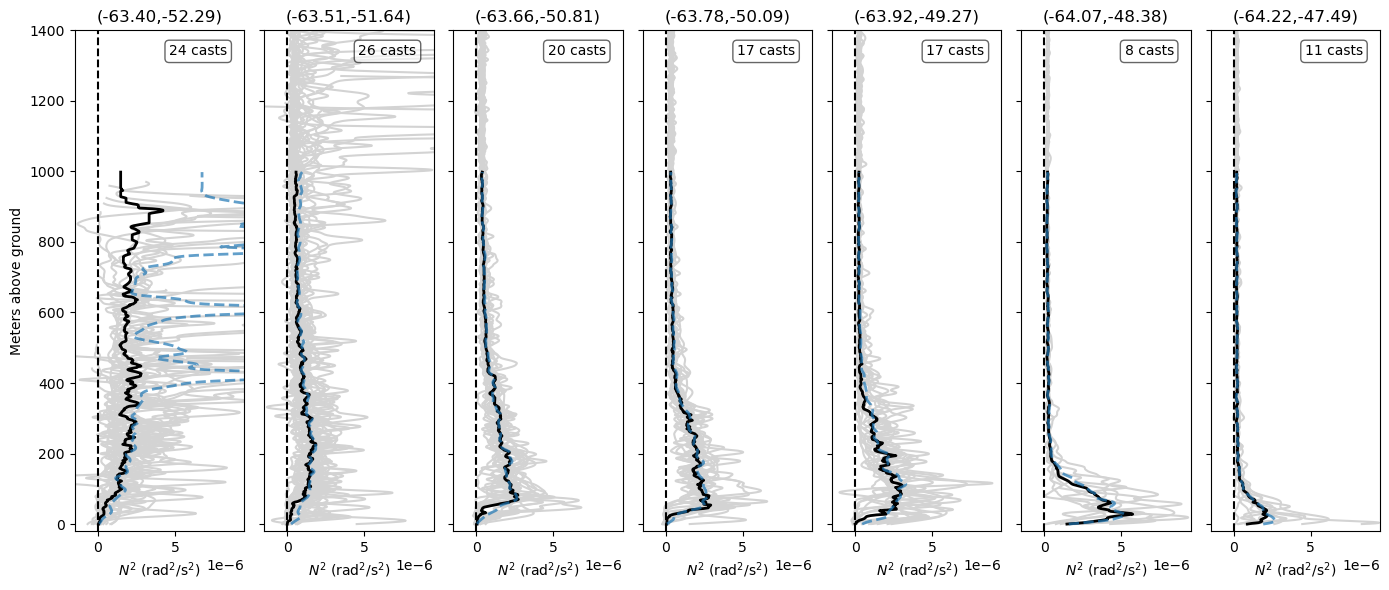

In [16]:
plot_averaged_N2(smoothing_window_size = 32)
plt.gca().set_xlim(-1.5e-6,9.5e-6)

(8e-09, 5e-05)

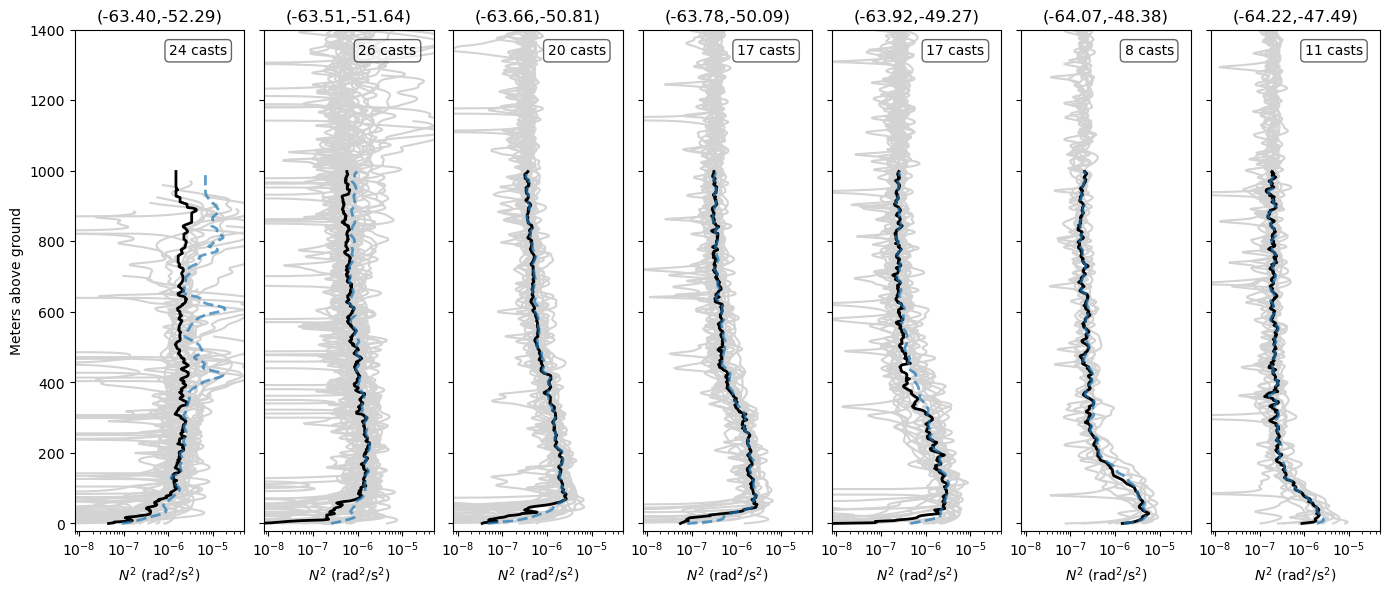

In [17]:
plot_averaged_N2(smoothing_window_size = 32)
plt.gca().set_xscale("log")
plt.gca().set_xlim(8e-9,5e-5)

(-10.0, 500.0)

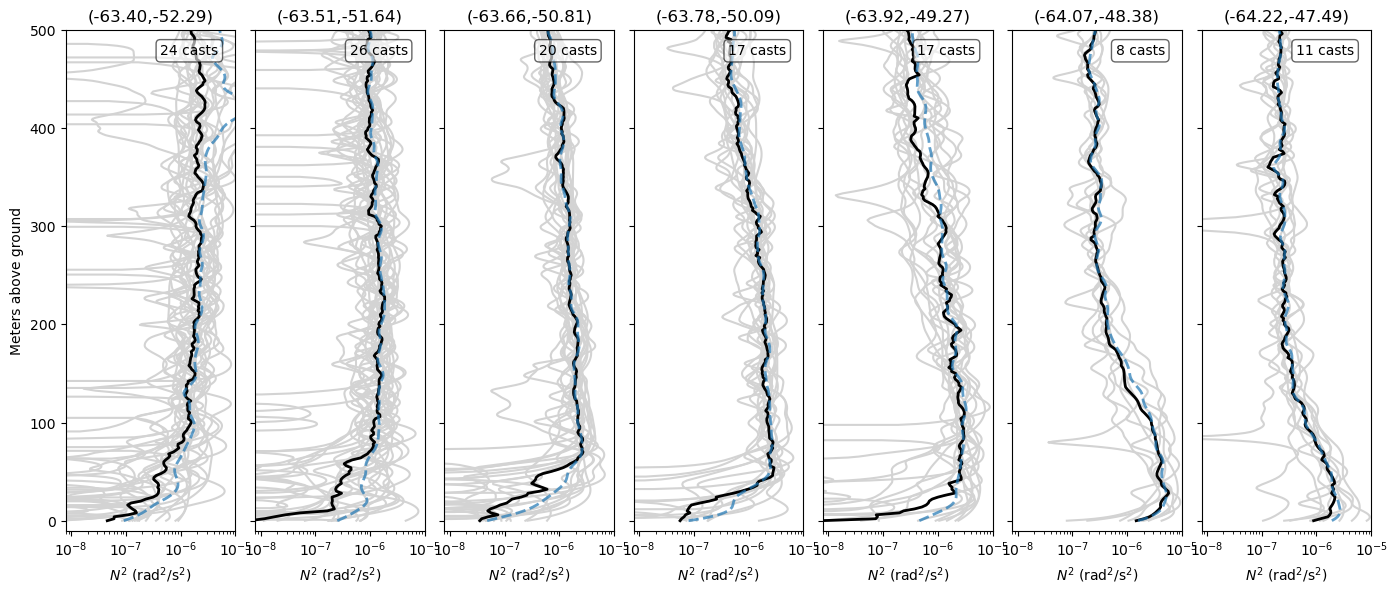

In [18]:
plot_averaged_N2(smoothing_window_size = 32)
plt.gca().set_xscale("log")
plt.gca().set_xlim(8e-9,1e-5)
#plt.gca().set_xlim(-1.5e-6,9.5e-6)
plt.gca().set_ylim(-10,500)

## Then at $N$

First $N^2$ is calculated, than averaged over the profiles and then the square root to get $N$ is taken.

In [37]:
def plot_averaged_N(smoothing_window_size):
    f,axis = plt.subplots(ncols = len(mooring_locations), sharey = True, sharex = True, figsize = (14,6))

    comparison_z_axis = np.arange(0,1000,2)

    CTDs_grouped = CTDs.groupby("Event")
    result_dict = {"mab":comparison_z_axis}
    
    for ax, (mooring, closest_ctd_casts) in zip(axis,dict_of_closest_ctds.items()):
        ax.set_title(mooring)
        ax.axvline(0, color = "k", ls = "--", zorder = 5)
        #print(closest_ctd_casts, pd.isna(closest_ctd_casts))
        number_of_valid_profiles = (~pd.isna(closest_ctd_casts)).sum()
        ax.text(0.9,0.95, s= f"{number_of_valid_profiles} casts", ha = "right", transform=ax.transAxes, bbox=dict(facecolor='white', alpha = 0.6, edgecolor='black', boxstyle='round'))

        # for calculating mean N2 profile for each mooring
        N2_array = []
        for cast_name in closest_ctd_casts:
            if pd.isna(cast_name): continue       

            #retrieve data 
            cast = CTDs_grouped.get_group(cast_name)

            try:
                absolute_salinity = cast["Absolute Salinity"]
                assert not np.all(np.isnan(absolute_salinity))
            except AssertionError:
                absolute_salinity = gsw.SA_from_SP(SP = cast["Sal"], p = cast["Press [dbar]"],lon=cast["Longitude"], lat=cast["Latitude"])
                assert not np.all(np.isnan(absolute_salinity))

            try:
                conservative_temperature = cast["Conservative Temperature"]
                assert not np.all(np.isnan(conservative_temperature))
            except AssertionError:
                conservative_temperature = gsw.CT_from_t(SA = absolute_salinity, t= cast["Temp [°C]"] , p = cast["Press [dbar]"])
                assert not np.all(np.isnan(conservative_temperature))
                
            #calculate square of buoyancy frequency    
            N2, N2pressure = gsw.Nsquared(
                SA = absolute_salinity,
                CT = conservative_temperature,
                p = cast["Press [dbar]"],
                lat = cast["Latitude"])
            depth = -1*gsw.z_from_p(p = N2pressure, lat = cast["Latitude"].mean()) 

            #convert N2 from (rad/s)^2 to 1/s^2
            #N2 = N2_in_radians / (2*np.pi)**2
            N2 = smooth(N2,smoothing_window_size)

            # change vertical coordinate 
            # to "meters above ground" or "distance from seafloor"
            mab = max(depth) - depth
            ax.plot(np.sqrt(N2),mab, c = "lightgrey")

            # interpolate to common grid
            new_N2 = np.interp(
                x = comparison_z_axis,
                xp = mab[::-1], #mab and N2 are reversed so that mab monotonically increases
                fp = N2[::-1]
                )
            N2_array.append(new_N2)

        mean_N2 = np.nanmean(N2_array, axis = 0)  #calculating the average
        median_N2 = np.nanmedian(N2_array, axis = 0)  #calculating the average
        #std_N2 = np.std(N2_array, axis = 0)
        ax.plot(np.sqrt(median_N2), comparison_z_axis, "k", lw = 2, label = "median") #plot median N2
        ax.plot(np.sqrt(mean_N2), comparison_z_axis, "--", lw = 2, alpha = 0.7, label = "mean") #plot mean N2

        result_dict[mooring] = np.sqrt(mean_N2)

        ax.set_xlabel("$N$ / (rad/s)")
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        
    axis[0].set_ylabel("Meters above ground")
    ax.set_ylim(-20,950)
    ax.set_xlim(-3e-4,4e-3)
    f.tight_layout()

In [20]:
#pd.DataFrame(result_dict).to_pickle("./poster_N_values.pkl")  
#pd.DataFrame(result_dict)

/tmp/ipykernel_33484/1832538653.py:53: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(N2),mab, c = "lightgrey")
/tmp/ipykernel_33484/1832538653.py:66: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(median_N2), comparison_z_axis, "k", lw = 2, label = "median") #plot median N2
/tmp/ipykernel_33484/1832538653.py:67: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(mean_N2), comparison_z_axis, "--", lw = 2, alpha = 0.7, label = "mean") #plot mean N2
/tmp/ipykernel_33484/1832538653.py:69: RuntimeWarning: invalid value encountered in sqrt
  result_dict[mooring] = np.sqrt(mean_N2)


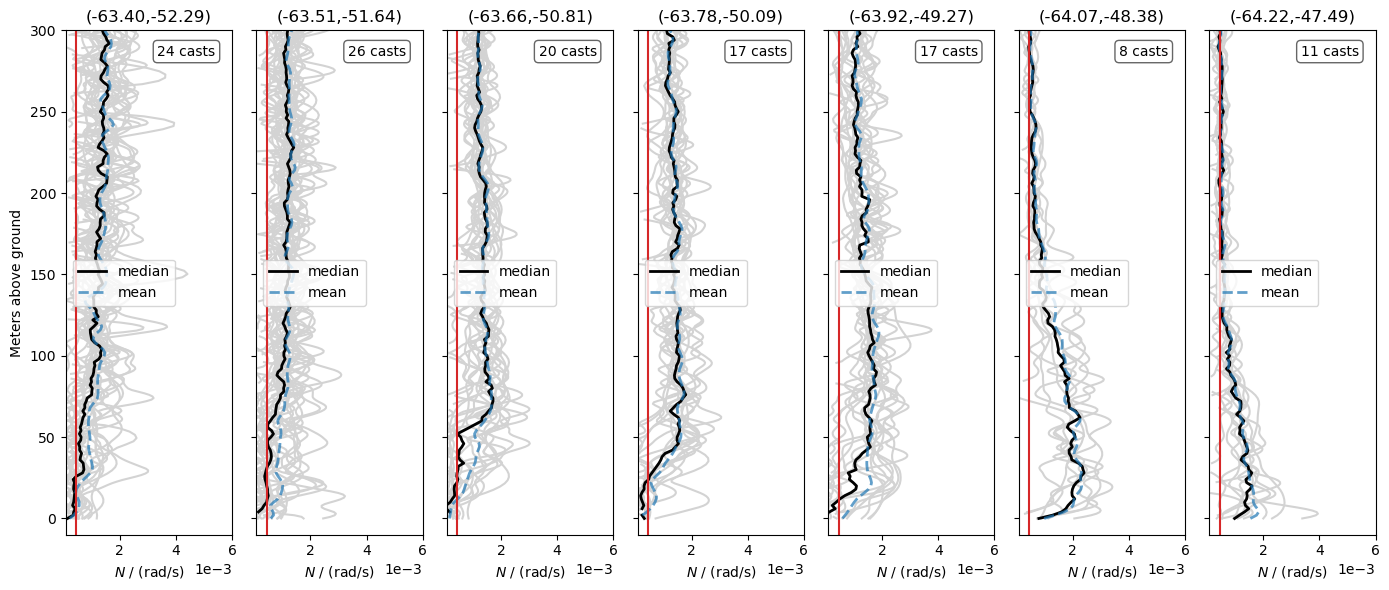

In [45]:
plot_averaged_N(smoothing_window_size = 16)
#plt.gca().set_xscale("log")
plt.gca().set_xlim(8e-5, 6e-3)
plt.gca().set_ylim(-10, 300)
for ax in plt.gcf().axes:
    ax.axvline(4.5e-4, color = "tab:red")
    ax.legend(loc = "center left")

/tmp/ipykernel_33484/1122285237.py:53: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(N2),mab, c = "lightgrey")


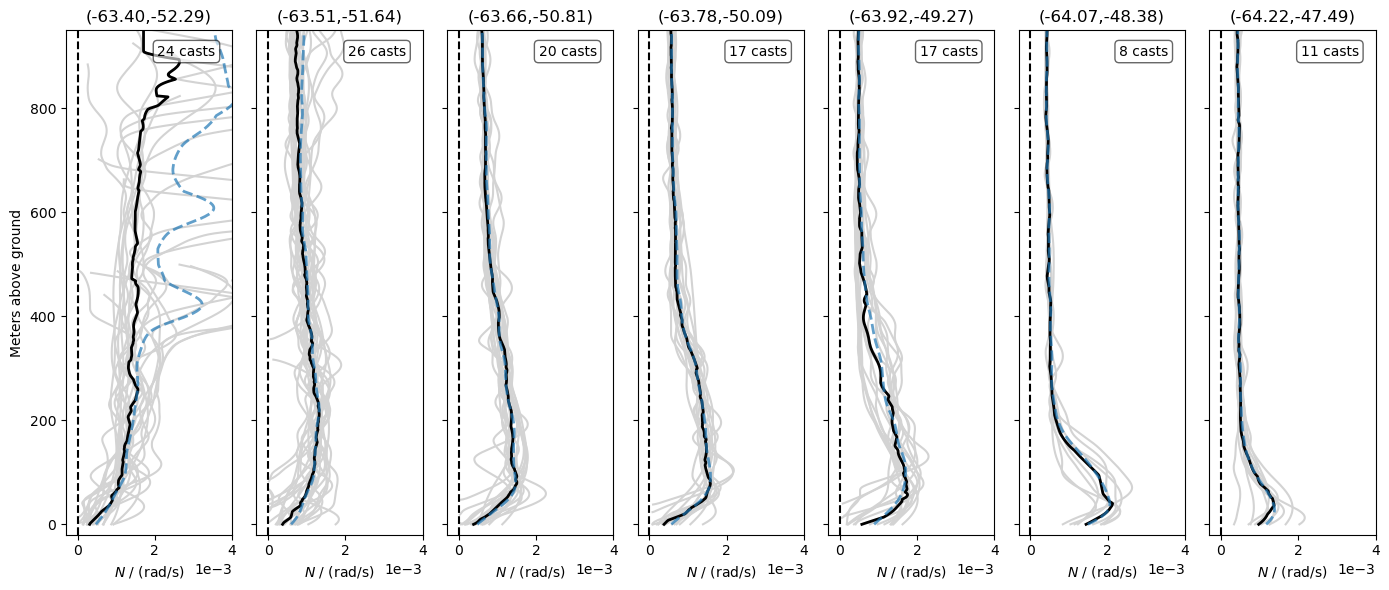

In [22]:
plot_averaged_N(smoothing_window_size = 100)

# Calculate Uncertainty of N  

From $N = \sqrt{N^2} = (N^2)^\frac{1}{2}$, we can derive that  
$
    \Delta N = \frac{1}{2} (N^2)^{-1/2}  \Delta N^2
$

In [23]:
def calculate_N_with_uncertainties(smoothing_window_size):
    f,axis = plt.subplots(ncols = len(mooring_locations), sharey = True, sharex = True, figsize = (14,6))

    comparison_z_axis = np.arange(0,600,1)

    CTDs_grouped = CTDs.groupby("Event")
    result_dict = {"mab":comparison_z_axis}
    error_dict = {"mab":comparison_z_axis}
    
    for ax, (mooring, closest_ctd_casts) in zip(axis,dict_of_closest_ctds.items()):
        ax.set_title(mooring)
        ax.axvline(0, color = "k", ls = "--", zorder = 5)
        #print(closest_ctd_casts, pd.isna(closest_ctd_casts))
        number_of_valid_profiles = (~pd.isna(closest_ctd_casts)).sum()
        ax.text(0.9,0.95, s= f"{number_of_valid_profiles} casts", ha = "right", transform=ax.transAxes, bbox=dict(facecolor='white', alpha = 0.6, edgecolor='black', boxstyle='round'))

        # for calculating mean N2 profile for each mooring
        N2_array = []
        for cast_name in closest_ctd_casts:
            if pd.isna(cast_name): continue       

            #retrieve data 
            cast = CTDs_grouped.get_group(cast_name)

            try:
                absolute_salinity = cast["Absolute Salinity"]
                assert not np.all(np.isnan(absolute_salinity))
            except AssertionError:
                absolute_salinity = gsw.SA_from_SP(SP = cast["Sal"], p = cast["Press [dbar]"],lon=cast["Longitude"], lat=cast["Latitude"])
                assert not np.all(np.isnan(absolute_salinity))

            try:
                conservative_temperature = cast["Conservative Temperature"]
                assert not np.all(np.isnan(conservative_temperature))
            except AssertionError:
                conservative_temperature = gsw.CT_from_t(SA = absolute_salinity, t= cast["Temp [°C]"] , p = cast["Press [dbar]"])
                assert not np.all(np.isnan(conservative_temperature))
                
            #calculate square of buoyancy frequency    
            N2, N2pressure = gsw.Nsquared(
                SA = absolute_salinity,
                CT = conservative_temperature,
                p = cast["Press [dbar]"],
                lat = cast["Latitude"])
            depth = -1*gsw.z_from_p(p = N2pressure, lat = cast["Latitude"].mean()) 

            #convert N2 from (rad/s)^2 to 1/s^2
            #N2 = N2_in_radians / (2*np.pi)**2
            N2 = smooth(N2,smoothing_window_size)

            # change vertical coordinate 
            # to "meters above ground" or "distance from seafloor"
            mab = max(depth) - depth
            ax.plot(np.sqrt(N2),mab, c = "lightgrey", zorder = -1)

            # interpolate to common grid
            new_N2 = np.interp(
                x = comparison_z_axis,
                xp = mab[::-1], #mab and N2 are reversed so that mab monotonically increases
                fp = N2[::-1]
                )
            N2_array.append(new_N2)

        mean_N2 = np.nanmean(N2_array, axis = 0)  #calculating the average
        median_N2 = np.nanmedian(N2_array, axis = 0)  #calculating the average
        std_N2 = np.nanstd(N2_array, axis = 0)
        d = np.abs(N2_array - np.nanmedian(N2_array, axis = 0))
        median_absolute_distance = np.nanmedian(d, axis = 0)
        
        ax.plot(np.sqrt(median_N2), comparison_z_axis, "k", lw = 2, zorder = 10) #plot median N2
        ax.plot(np.sqrt(mean_N2), comparison_z_axis, "g--", lw = 2, alpha = 0.7) #plot mean N2

        #error of N from gaussian error propagation
        delta_N_std = 1/2 * (mean_N2)**(-1/2) * std_N2
        delta_N_mad = 1/2 * (median_N2)**(-1/2) * median_absolute_distance
        
        #ax.fill_betweenx(y = comparison_z_axis, x1 = np.sqrt(mean_N2) - delta_N_std, x2 = np.sqrt(mean_N2) + delta_N_std, alpha = 0.5) #plot mean N2
        ax.fill_betweenx(y = comparison_z_axis, x1 = np.sqrt(median_N2) - delta_N_mad, x2 = np.sqrt(median_N2) + delta_N_mad, alpha = 1) #plot mean N2
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
        result_dict[mooring] = np.sqrt(median_N2)

        error_dict[mooring] = delta_N_mad

        ax.set_xlabel("$N$ / (rad/s)")

    axis[0].set_ylabel("Meters above ground")
    ax.set_ylim(-20,550)
    ax.set_xlim(-3e-4,3e-3)
    f.tight_layout()
    
    return result_dict, error_dict

/tmp/ipykernel_33484/3380004152.py:54: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(N2),mab, c = "lightgrey", zorder = -1)
/tmp/ipykernel_33484/3380004152.py:70: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(median_N2), comparison_z_axis, "k", lw = 2, zorder = 10) #plot median N2
/tmp/ipykernel_33484/3380004152.py:71: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(mean_N2), comparison_z_axis, "g--", lw = 2, alpha = 0.7) #plot mean N2
/tmp/ipykernel_33484/3380004152.py:74: RuntimeWarning: invalid value encountered in power
  delta_N_std = 1/2 * (mean_N2)**(-1/2) * std_N2
/tmp/ipykernel_33484/3380004152.py:75: RuntimeWarning: invalid value encountered in power
  delta_N_mad = 1/2 * (median_N2)**(-1/2) * median_absolute_distance
/tmp/ipykernel_33484/3380004152.py:78: RuntimeWarning: invalid value encountered in sqrt
  ax.fill_betweenx(y = comparison_z_axis, x1 = np.sqrt(median_N2) - delta_N_mad, x2 = np.sqrt(median_N2) + de

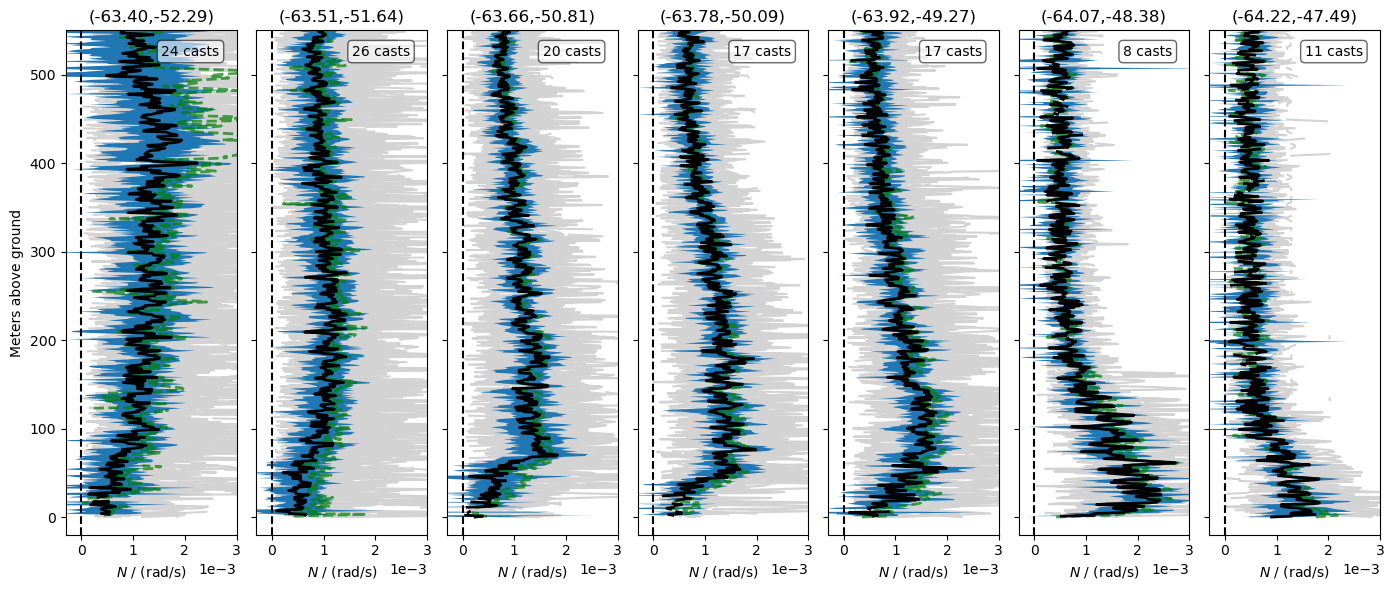

In [24]:
result_dict, error_dict = calculate_N_with_uncertainties(smoothing_window_size = 4)

/tmp/ipykernel_33484/3380004152.py:54: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(N2),mab, c = "lightgrey", zorder = -1)
/tmp/ipykernel_33484/3380004152.py:70: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(median_N2), comparison_z_axis, "k", lw = 2, zorder = 10) #plot median N2
/tmp/ipykernel_33484/3380004152.py:75: RuntimeWarning: invalid value encountered in power
  delta_N_mad = 1/2 * (median_N2)**(-1/2) * median_absolute_distance
/tmp/ipykernel_33484/3380004152.py:78: RuntimeWarning: invalid value encountered in sqrt
  ax.fill_betweenx(y = comparison_z_axis, x1 = np.sqrt(median_N2) - delta_N_mad, x2 = np.sqrt(median_N2) + delta_N_mad, alpha = 1) #plot mean N2
/tmp/ipykernel_33484/3380004152.py:81: RuntimeWarning: invalid value encountered in sqrt
  result_dict[mooring] = np.sqrt(median_N2)
/tmp/ipykernel_33484/3380004152.py:71: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(mean_N2), comparison_z_axis, "g--", lw = 

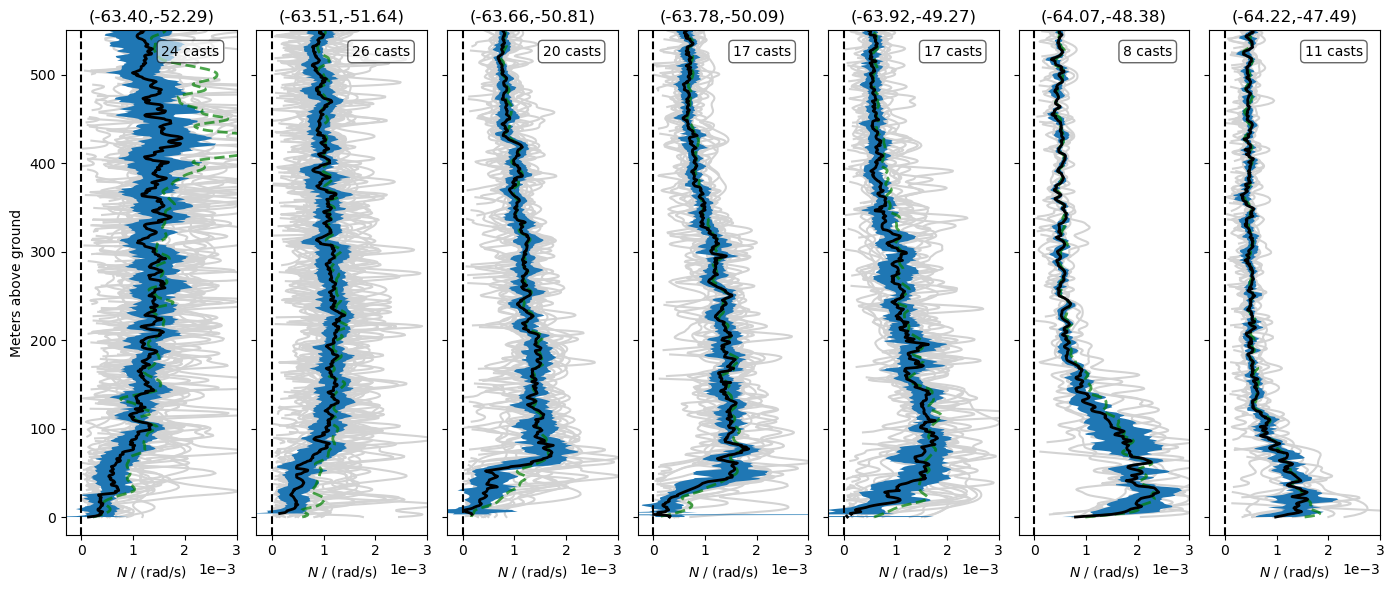

In [25]:
result_dict, error_dict = calculate_N_with_uncertainties(smoothing_window_size = 16)

/tmp/ipykernel_33484/3380004152.py:54: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(N2),mab, c = "lightgrey", zorder = -1)


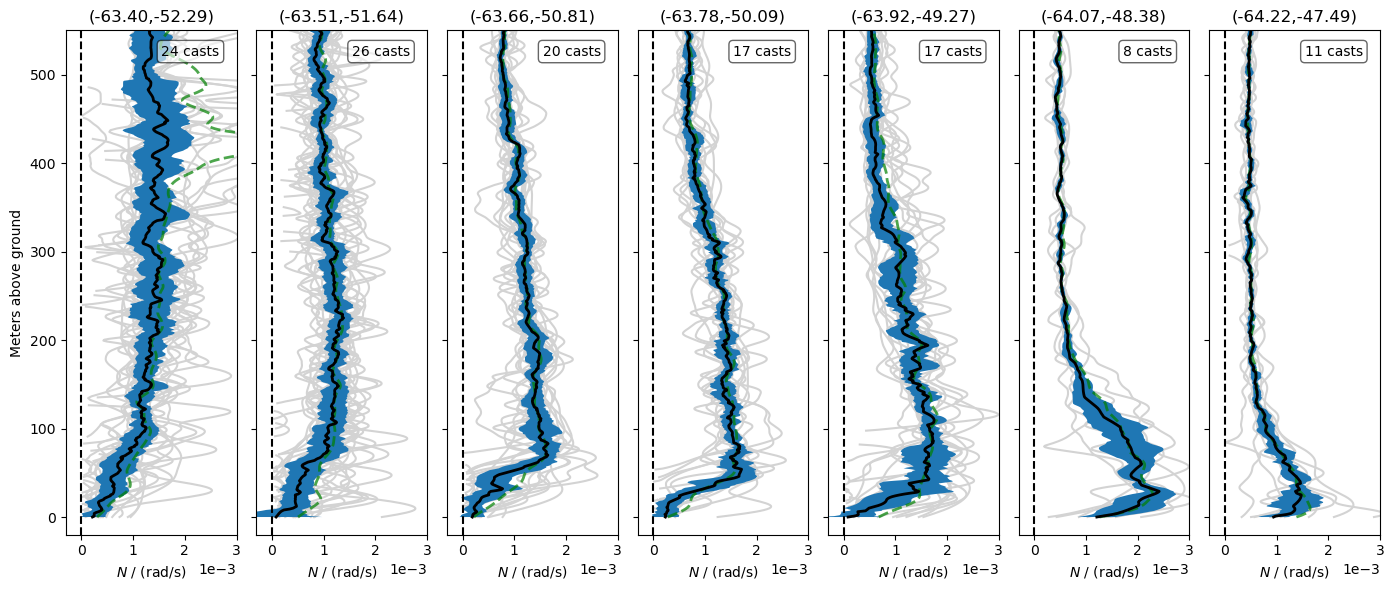

In [26]:
result_dict, error_dict = calculate_N_with_uncertainties(smoothing_window_size = 32)

In [27]:
pd.DataFrame(result_dict).to_pickle("./method_results/N_values.pkl")  
pd.DataFrame(result_dict)

,mab,"(-63.40,-52.29)","(-63.51,-51.64)","(-63.66,-50.81)","(-63.78,-50.09)","(-63.92,-49.27)","(-64.07,-48.38)","(-64.22,-47.49)"
0,0,0.000213,0.000079,0.000188,0.000237,0.000085,0.001210,0.000943
1,1,0.000249,0.000094,0.000197,0.000245,0.000197,0.001318,0.000982
2,2,0.000246,0.000109,0.000195,0.000244,0.000271,0.001421,0.001090
3,3,0.000247,0.000121,0.000202,0.000228,0.000284,0.001520,0.001202
4,4,0.000247,0.000134,0.000224,0.000258,0.000281,0.001600,0.001274
...,...,...,...,...,...,...,...,...
595,595,0.001344,0.000843,0.000744,0.000677,0.000514,0.000504,0.000461
596,596,0.001344,0.000857,0.000734,0.000680,0.000514,0.000493,0.000459
597,597,0.001345,0.000868,0.000726,0.000683,0.000503,0.000491,0.000454
598,598,0.001346,0.000873,0.000732,0.000686,0.000494,0.000498,0.000454


In [28]:
pd.DataFrame(error_dict).to_pickle("./method_results/N_std.pkl")  
pd.DataFrame(error_dict)

,mab,"(-63.40,-52.29)","(-63.51,-51.64)","(-63.66,-50.81)","(-63.78,-50.09)","(-63.92,-49.27)","(-64.07,-48.38)","(-64.22,-47.49)"
0,0,0.000242,0.000892,0.000244,0.000261,0.000673,0.000360,0.000296
1,1,0.000227,0.000645,0.000231,0.000252,0.000385,0.000367,0.000284
2,2,0.000218,0.000563,0.000224,0.000262,0.000350,0.000374,0.000289
3,3,0.000232,0.000566,0.000206,0.000245,0.000345,0.000399,0.000287
4,4,0.000243,0.000470,0.000175,0.000190,0.000333,0.000440,0.000250
...,...,...,...,...,...,...,...,...
595,595,0.000369,0.000163,0.000062,0.000112,0.000078,0.000061,0.000027
596,596,0.000342,0.000162,0.000059,0.000115,0.000070,0.000058,0.000031
597,597,0.000311,0.000156,0.000059,0.000130,0.000070,0.000058,0.000036
598,598,0.000313,0.000144,0.000053,0.000118,0.000063,0.000056,0.000033
